Importing the Dependencies:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
#loading the file into pandas dataframe:
df = pd.read_csv('/content/drive/MyDrive/Fraud.csv')

In [ ]:
#printing the first five rows of the dataset:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#printing the last five rows of the dataset:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
#checking the rows and columns of the dataset:
df.shape

(6362620, 11)

In [ ]:
#checking the missing values:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#more information about the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
#seperating fraudelent and non fraudlent data:
df_0 = df[df['isFraud'] == 0]
df_1 = df[df['isFraud'] == 1]

In [ ]:
df_0.isFraud.value_counts()

0    6354407
Name: isFraud, dtype: int64

In [ ]:
df_1.isFraud.value_counts()

1    8213
Name: isFraud, dtype: int64

In [ ]:
#check the number of 1s and 0s:
count = df['isFraud'].value_counts()
print('Fraudulent "1" :', count[1])
print('Not Fraudulent "0":', count[0])

Fraudulent "1" : 8213
Not Fraudulent "0": 6354407


Separating Features and Target:

In [ ]:
X = df.drop(columns = ['isFraud' , 'type', 'nameOrig', 'nameDest'], axis = 1)
Y = df['isFraud']

In [ ]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [ ]:
print(X)

         step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     9839.64      170136.00       160296.36            0.00   
1           1     1864.28       21249.00        19384.72            0.00   
2           1      181.00         181.00            0.00            0.00   
3           1      181.00         181.00            0.00        21182.00   
4           1    11668.14       41554.00        29885.86            0.00   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13            0.00            0.00   
6362616   743  6311409.28     6311409.28            0.00            0.00   
6362617   743  6311409.28     6311409.28            0.00        68488.84   
6362618   743   850002.52      850002.52            0.00            0.00   
6362619   743   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFlaggedFraud  
0                  0.00               0  
1  

In [ ]:
print(Y)

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64


Train Test Split:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

Model Training:

In [ ]:
# creating an instance of the model

model = LogisticRegression()

model.fit(X, Y)

Y_predict = model.predict(X)

In [ ]:
accuracy_score(Y_predict, Y)

0.9982672232507992

Resampling Technique:

In [ ]:
#isFraud count:
isFraud_count_0, isFraud_count_1 = df['isFraud'].value_counts()

isFraud_0 = df[df['isFraud'] == 0]
isFraud_1 = df[df['isFraud'] == 1]

In [ ]:
#print the shape of the class:
print('isFraud 0:', isFraud_0.shape)
print('\nisFraud 1:', isFraud_1.shape)

isFraud 0: (6354407, 11)

isFraud 1: (8213, 11)


Random under sampling:

total isFraud of 1 and 0:
 0    8213
1    8213
Name: isFraud, dtype: int64


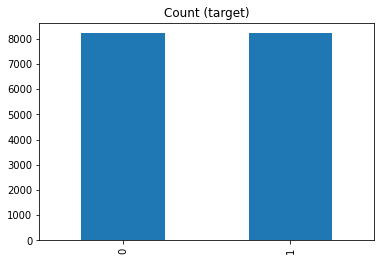

In [ ]:
isFraud_0_under = isFraud_0.sample(isFraud_count_1)

test_under = pd.concat([isFraud_0_under, isFraud_1], axis=0)

print("total isFraud of 1 and 0:\n",test_under['isFraud'].value_counts())

test_under['isFraud'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

 Random over sampling

isFraud count of 1 and 0:
 1    6354407
0    6354407
Name: isFraud, dtype: int64


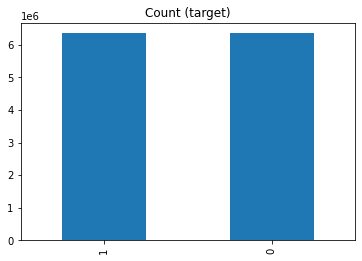

In [ ]:
isFraud_1_over = isFraud_1.sample(isFraud_count_0, replace=True)

test_under = pd.concat([isFraud_1_over, isFraud_0], axis=0)

# print the number of class count
print('isFraud count of 1 and 0:\n', test_under['isFraud'].value_counts())

# plot the count
test_under['isFraud'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()